In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Flight_Booking.csv")

In [3]:
df = df.drop(columns = ["Unnamed: 0"])

In [4]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

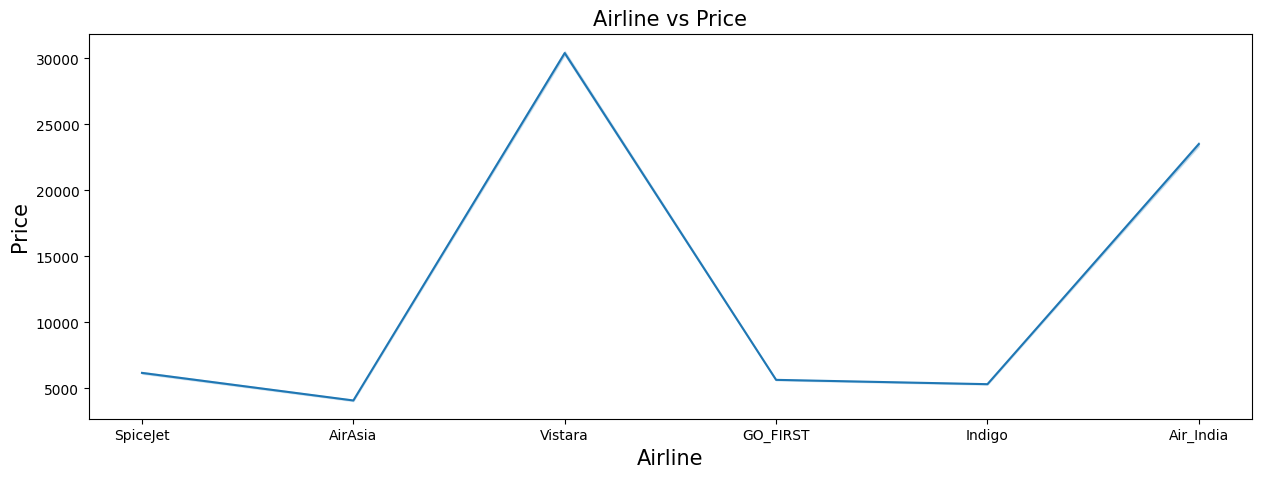

In [9]:
plt.figure(figsize =(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airline vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

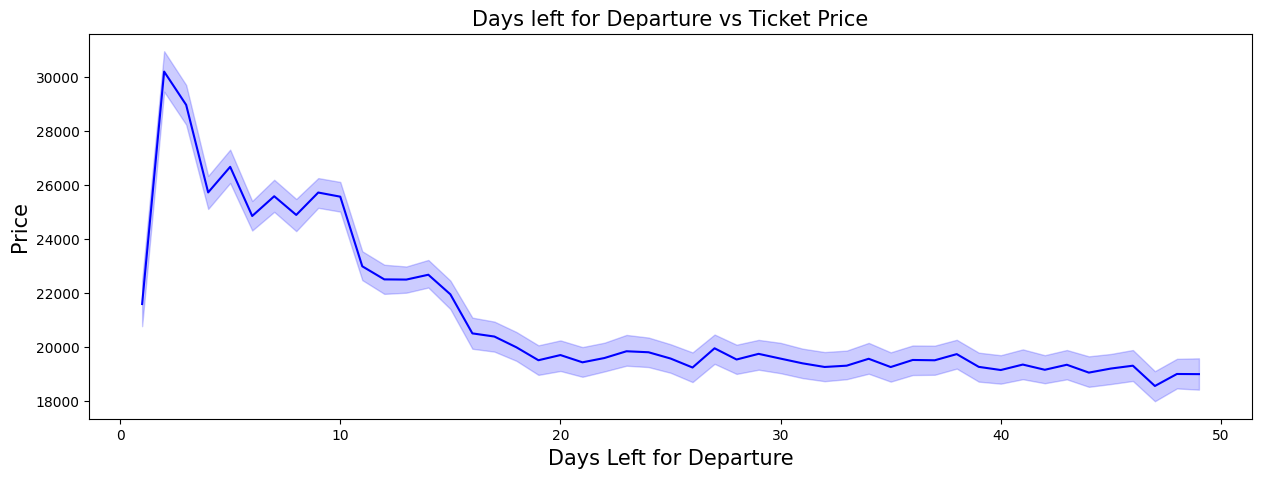

In [10]:
plt.figure(figsize =(15,5))
sns.lineplot(data =df,x= 'days_left',y='price',color = "blue")
plt.title('Days left for Departure vs Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

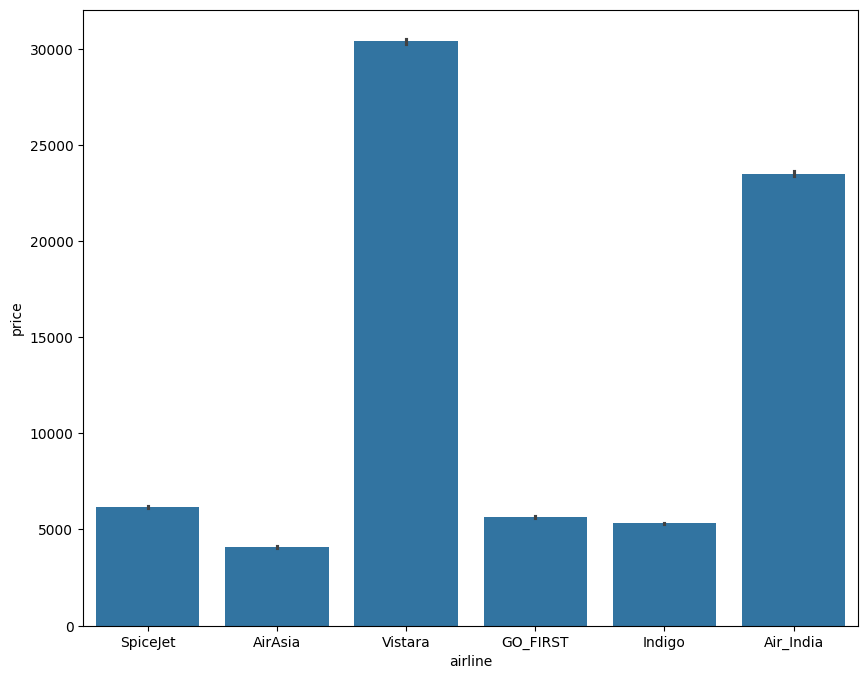

In [11]:
plt.figure(figsize =(10,8))
sns.barplot(data =df,x= 'airline',y='price')
plt.show()

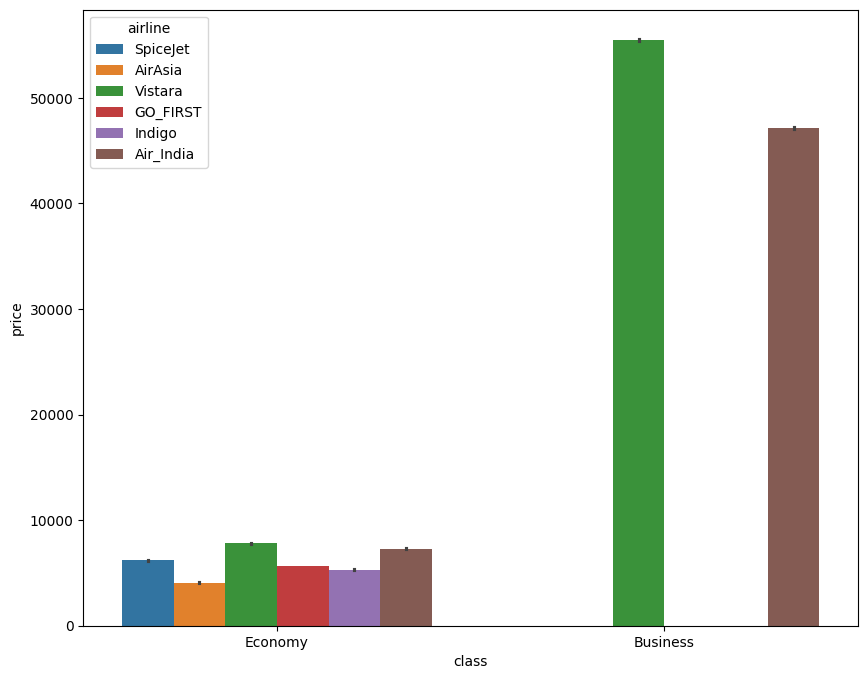

In [12]:
plt.figure(figsize =(10,8))
sns.barplot(data =df,x= 'class',y='price', hue = "airline")
plt.show()

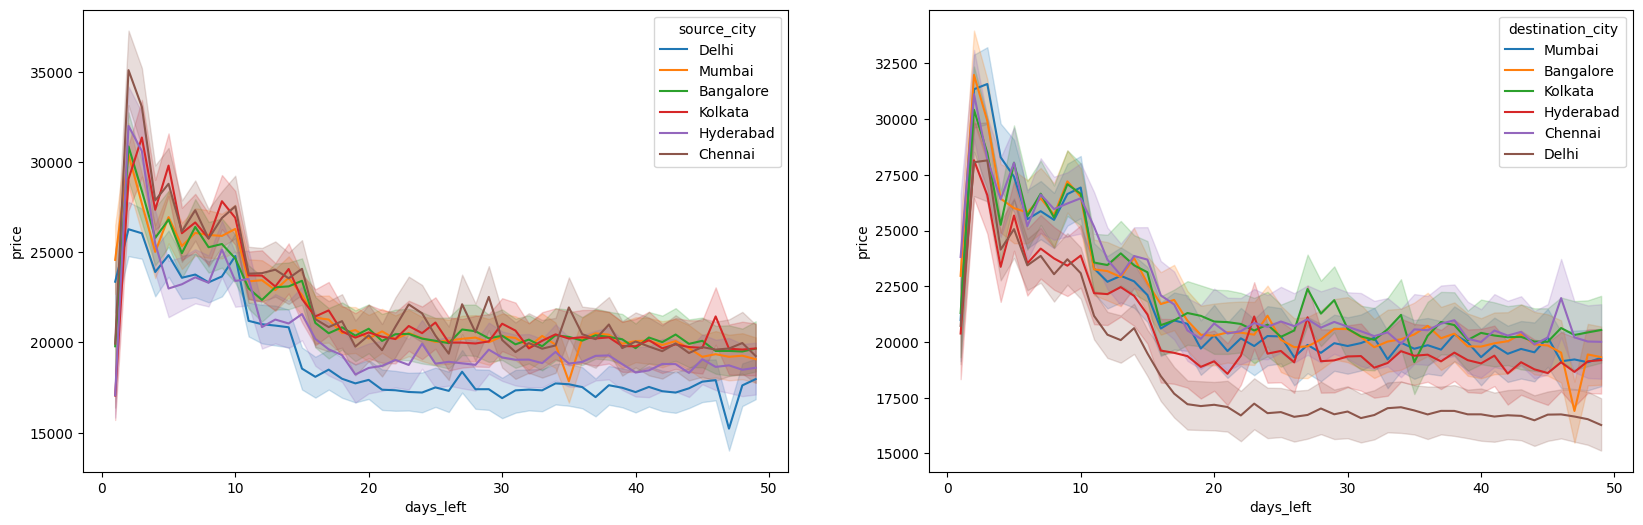

In [13]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city' ,ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city' ,ax=ax[1])
plt.show()

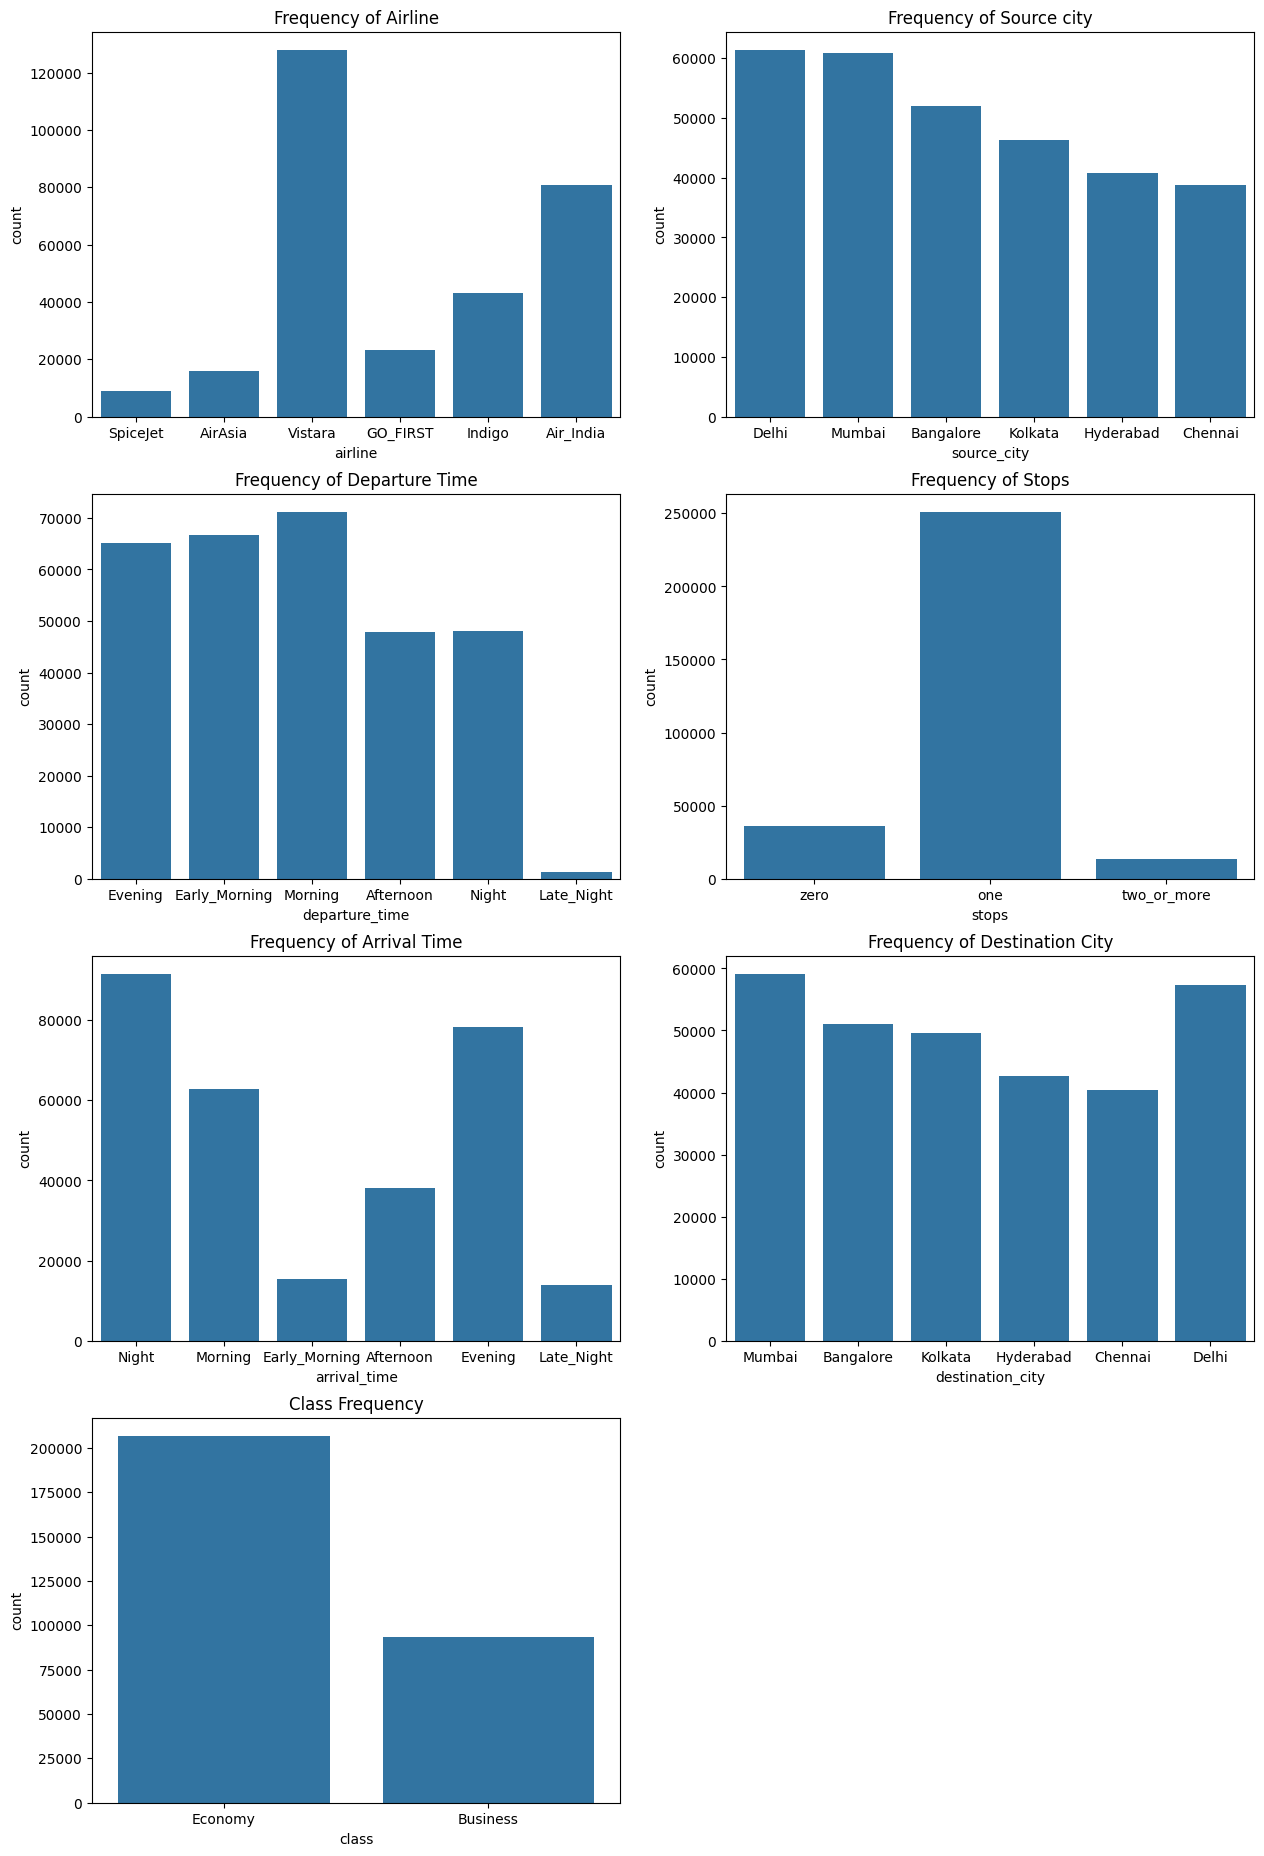

In [14]:
plt.figure(figsize =(15,23))

plt.subplot(4,2,1)
sns.countplot(x =df['airline'], data =df)
plt.title("Frequency of Airline")

plt.subplot(4,2,2)
sns.countplot(x =df['source_city'], data =df)
plt.title("Frequency of Source city")

plt.subplot(4,2,3)
sns.countplot(x =df['departure_time'], data =df)
plt.title("Frequency of Departure Time")

plt.subplot(4,2,4)
sns.countplot(x =df['stops'], data =df)
plt.title("Frequency of Stops")

plt.subplot(4,2,5)
sns.countplot(x =df['arrival_time'], data =df)
plt.title("Frequency of Arrival Time")

plt.subplot(4,2,6)
sns.countplot(x =df['destination_city'], data =df)
plt.title("Frequency of Destination City")

plt.subplot(4,2,7)
sns.countplot(x =df['class'], data =df)
plt.title("Class Frequency")

plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["airline"] =le.fit_transform(df["airline"])
df["source_city"] =le.fit_transform(df["source_city"])
df["departure_time"] =le.fit_transform(df["departure_time"])
df["stops"] =le.fit_transform(df["stops"])
df["arrival_time"] =le.fit_transform(df["arrival_time"])
df["destination_city"] = le.fit_transform(df["destination_city"])
df["class"] =le.fit_transform(df["class"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


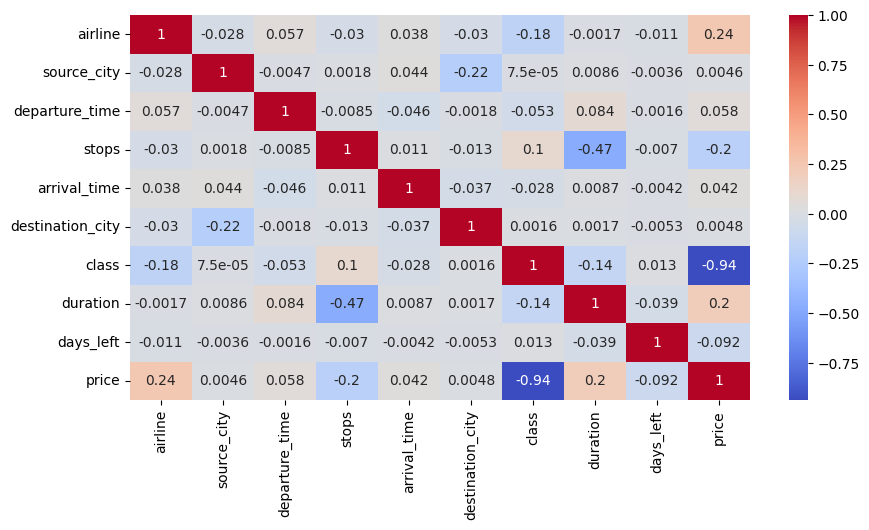

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.loc[:, df.columns != 'flight'].corr(), annot=True, cmap ="coolwarm")
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [18]:
col_list=[]
for col in df.columns:
    if ((df[col].dtype != 'object') &(col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data =pd.DataFrame()
vif_data["feature"] =X.columns
vif_data["VIF"] = [VIF(X.values,i) 
                   for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [19]:
#All feature have vif less than 4 except duration. We will drop it and use it as the dependent in the regression models
#flight will also dropped here since it wasn't measured 

In [20]:
X =df.drop(columns =['duration','flight'])
y =df['duration']
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test =tts(X,y,test_size = 0.2, random_state=42)
from sklearn.preprocessing import StandardScaler as SS
sc =SS()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LinearRegression as LR
lr =LR()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
difference = pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_Value","Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,19.75,13.782890
1,9.83,15.488882
2,10.50,13.159669
3,14.50,15.751020
4,8.25,12.844670
...,...,...
60026,12.58,12.854008
60027,2.17,3.202198
60028,13.58,13.261734
60029,2.00,3.117537


In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn import metrics
#mean absolute error = mae
mae = metrics.mean_absolute_error(y_test,y_pred)
print("Mean absolute error:",mae)
from sklearn.metrics import mean_absolute_percentage_error as mape
#mean absolute percentage error =mape
mape(y_test,y_pred)
#mean square errorr = mse
mse = metrics.mean_squared_error(y_test,y_pred)
print("Mean squared error:",mse)
#root means squared error =rmse
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",rmse)


Mean absolute error: 4.837893966709409
Mean squared error: 38.848459859798474
Root Mean squared error: 6.232853267950279


C:\Users\david\AppData\Local\Temp\ipykernel_15488\2643576592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label ="Actual")
C:\Users\david\AppData\Local\Temp\ipykernel_15488\2643576592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label = "Predicted")


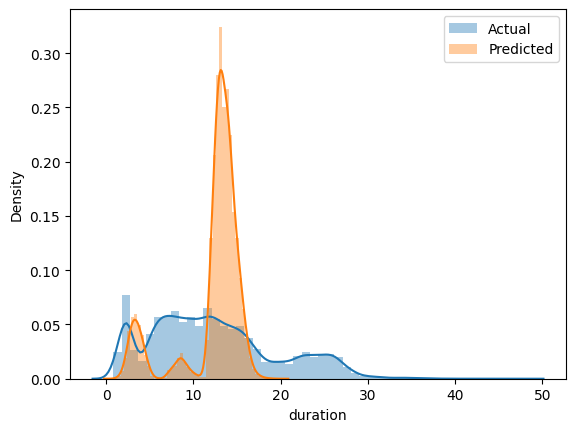

In [22]:
sns.distplot(y_test,label ="Actual")
sns.distplot(y_pred,label = "Predicted")
plt.legend()
plt.show()

In [23]:
#next we'll do a decison tree to see if we can get a better predictor

In [24]:
from sklearn.tree import DecisionTreeRegressor as DT
dt = DT()
dt.fit(x_train,y_train)
y_pred =dt.predict(x_test)
r2_score(y_test,y_pred)
dt_mae = metrics.mean_absolute_error(y_test,y_pred)
print("Decision Tree Mean absolute error:",dt_mae)

mape(y_test,y_pred) 
dt_mse = metrics.mean_squared_error(y_test,y_pred)

print("Decision Tree Mean squared error:",dt_mse)

dt_rmse =np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Decision Tree Root Mean squared error:",dt_rmse)


Decision Tree Mean absolute error: 0.9129547220047426
Decision Tree Mean squared error: 5.969803414677221
Decision Tree Root Mean squared error: 2.4433181157346704


C:\Users\david\AppData\Local\Temp\ipykernel_15488\4157755456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label ="Actual")
C:\Users\david\AppData\Local\Temp\ipykernel_15488\4157755456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label = "Predicted")


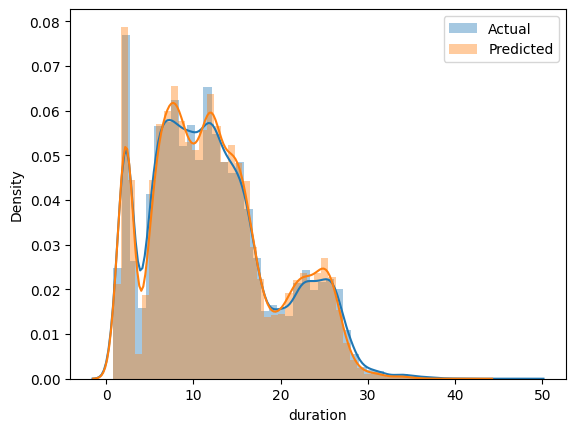

In [28]:
sns.distplot(y_test,label ="Actual")
sns.distplot(y_pred,label = "Predicted")
plt.legend()
plt.show()

In [31]:
from sklearn.ensemble import RandomForestRegressor as RF
rf = RF()
rf.fit(x_train,y_train)
y_pred =rf.predict(x_test)
r2_score(y_test,y_pred)
rf_mae = metrics.mean_absolute_error(y_test,y_pred)
print("Random Forest Mean absolute error:",rf_mae)
mape(y_test,y_pred) 
rf_mse = metrics.mean_squared_error(y_test,y_pred)
rf_mse
print("Random Forest Mean squared error:",rf_mse)

rf_rmse =np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Random Forest Root Mean squared error:",rf_rmse)

Random Forest Mean absolute error: 0.8694810285716194
Random Forest Mean squared error: 4.205098391703269
Random Forest Root Mean squared error: 2.0506336561422347


C:\Users\david\AppData\Local\Temp\ipykernel_15488\2643576592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label ="Actual")
C:\Users\david\AppData\Local\Temp\ipykernel_15488\2643576592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label = "Predicted")


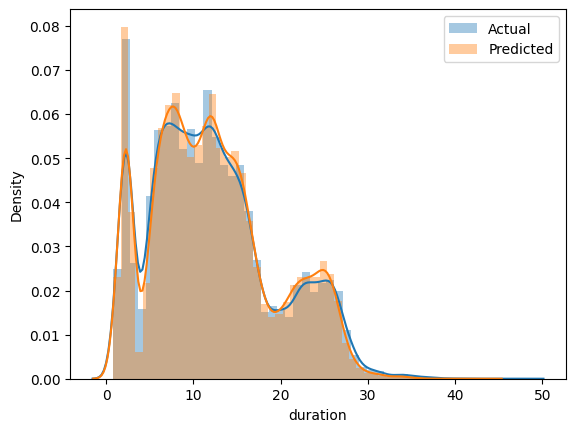

In [32]:
sns.distplot(y_test,label ="Actual")
sns.distplot(y_pred,label = "Predicted")
plt.legend()
plt.show()

In [33]:
difference = pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_Value","Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,19.75,19.556800
1,9.83,10.545650
2,10.50,12.143840
3,14.50,13.598925
4,8.25,8.387100
...,...,...
60026,12.58,12.419200
60027,2.17,2.170000
60028,13.58,13.580000
60029,2.00,2.010100
